## Import Libraries

In [313]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [314]:
filterwarnings('ignore')

## Import Dataset

In [315]:
data = pd.read_csv('credit_card.csv')
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Data Preprocessing

#### Dropping the `CUST_ID` column

In [316]:
data.drop(labels = ["CUST_ID"], axis = 'columns', inplace = True)

#### Converting columns from `upper case` to `lower case` for better usability

In [317]:
def make_lower(col):
    return col.lower()

data.columns = pd.Index(map(make_lower, data.columns))

In [318]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   balance                           8950 non-null   float64
 1   balance_frequency                 8950 non-null   float64
 2   purchases                         8950 non-null   float64
 3   oneoff_purchases                  8950 non-null   float64
 4   installments_purchases            8950 non-null   float64
 5   cash_advance                      8950 non-null   float64
 6   purchases_frequency               8950 non-null   float64
 7   oneoff_purchases_frequency        8950 non-null   float64
 8   purchases_installments_frequency  8950 non-null   float64
 9   cash_advance_frequency            8950 non-null   float64
 10  cash_advance_trx                  8950 non-null   int64  
 11  purchases_trx                     8950 non-null   int64  
 12  credit

#### Reducing the memory usage by the dataset by typecasting

In [319]:
data.iloc[:, [0,1,2,3,4,5,6,7,8,9,12,13,14,15]]= data.iloc[:, [0,1,2,3,4,5,6,7,8,9,12,13,14,15]].astype('float32')
data.iloc[:, [10, 11 ]] = data.iloc[:, [10, 11 , 16]].astype('int16')

In [320]:
data['tenure'] = data['tenure'].astype('category')

In [321]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   balance                           8950 non-null   float32 
 1   balance_frequency                 8950 non-null   float32 
 2   purchases                         8950 non-null   float32 
 3   oneoff_purchases                  8950 non-null   float32 
 4   installments_purchases            8950 non-null   float32 
 5   cash_advance                      8950 non-null   float32 
 6   purchases_frequency               8950 non-null   float32 
 7   oneoff_purchases_frequency        8950 non-null   float32 
 8   purchases_installments_frequency  8950 non-null   float32 
 9   cash_advance_frequency            8950 non-null   float32 
 10  cash_advance_trx                  8950 non-null   int16   
 11  purchases_trx                     8950 non-null   int16 

#### Dropping the row where `credit_limit` is `NaN`

In [322]:
data = data.dropna(subset = ["credit_limit"])
data.set_index(np.arange(len(data)), inplace = True)
data.head()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,40.900749,0.818182,95.400002,0.000000,95.400002,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802078,139.509781,0.000000,12
1,3202.467529,0.909091,0.000000,0.000000,0.000000,6442.945312,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032715,1072.340210,0.222222,12
2,2495.148926,1.000000,773.169983,773.169983,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066772,627.284790,0.000000,12
3,1666.670532,0.636364,1499.000000,1499.000000,0.000000,205.788010,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714355,1.000000,16.000000,16.000000,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334778,244.791245,0.000000,12


#### Filling `missing values` of the `minimum_payments` column by it's `mean` value

In [323]:
data.fillna({
    'minimum_payments' : data['minimum_payments'].mean()
}, inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8949 entries, 0 to 8948
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   balance                           8949 non-null   float32 
 1   balance_frequency                 8949 non-null   float32 
 2   purchases                         8949 non-null   float32 
 3   oneoff_purchases                  8949 non-null   float32 
 4   installments_purchases            8949 non-null   float32 
 5   cash_advance                      8949 non-null   float32 
 6   purchases_frequency               8949 non-null   float32 
 7   oneoff_purchases_frequency        8949 non-null   float32 
 8   purchases_installments_frequency  8949 non-null   float32 
 9   cash_advance_frequency            8949 non-null   float32 
 10  cash_advance_trx                  8949 non-null   int16   
 11  purchases_trx                     8949 non-null   int16 

## EDA

#### `Credit Limit` vs `Balance` scatterplot with respect to `tenure`

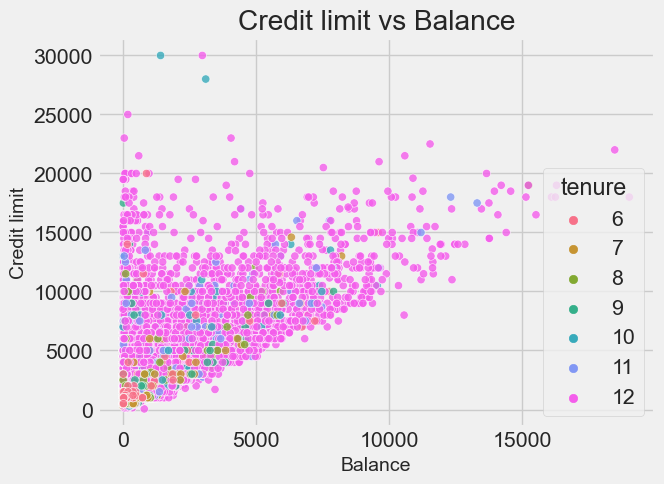

In [324]:
plt.style.use('fivethirtyeight')
sns.scatterplot(x = 'balance', y = 'credit_limit', data = data, hue = 'tenure', alpha = 0.8)
plt.xlabel("Balance")
plt.ylabel("Credit limit")
plt.title("Credit limit vs Balance")
plt.show()

`There is a tendency that if the balance is high, credit limit will also be high`

#### `Cash Advance` vs `Balance` scatterplot with respect to `tenure`

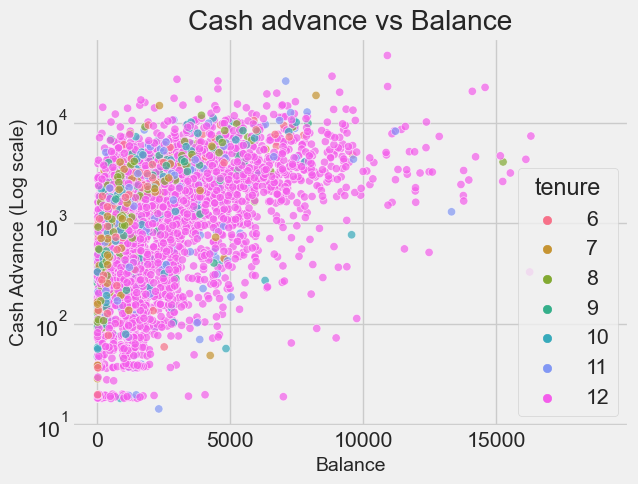

In [325]:
plt.style.use('fivethirtyeight')
sns.scatterplot(x = 'balance', y = 'cash_advance', data = data, hue = 'tenure', alpha = 0.7)
plt.yscale('log')
plt.xlabel("Balance")
plt.ylabel("Cash Advance (Log scale)")
plt.title("Cash advance vs Balance")
plt.show()

#### Probability density function of `balance`

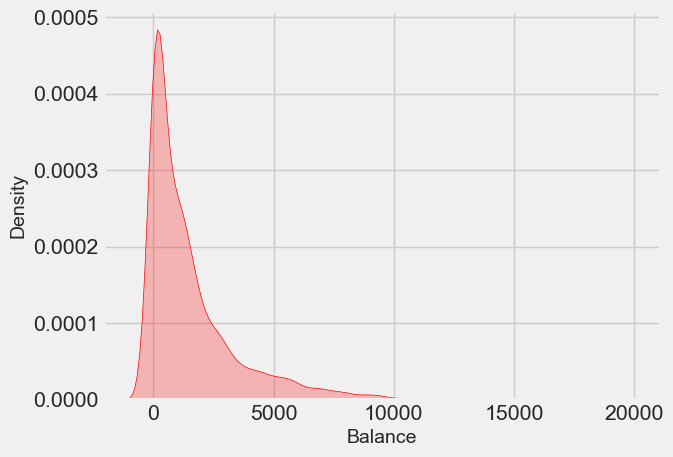

In [326]:
sns.kdeplot(x = 'balance', data = data, fill = True, color = 'red')
plt.xlabel("Balance")
plt.show()

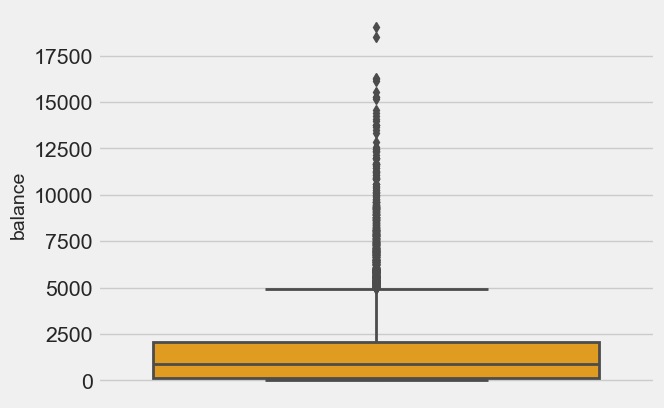

In [327]:
sns.boxplot(y = "balance", data = data, linewidth = 2, color = 'orange')
plt.show()

`Most of the users having low credit balance`

#### Probability density function of `purchases`

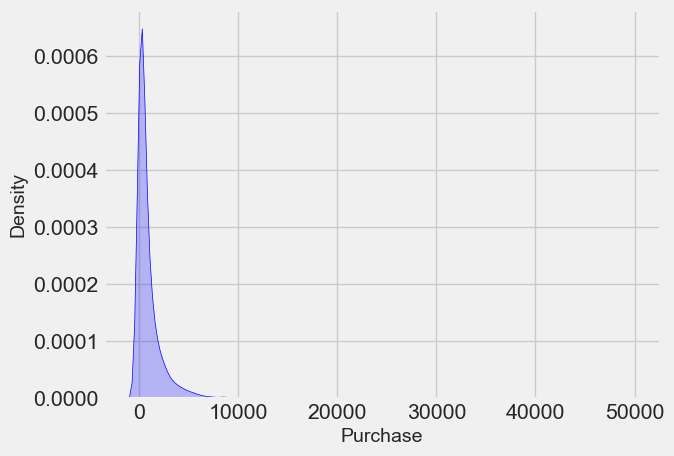

In [328]:
sns.kdeplot(x = 'purchases', data = data, fill = True, color = 'blue')
plt.xlabel("Purchase")
plt.show()

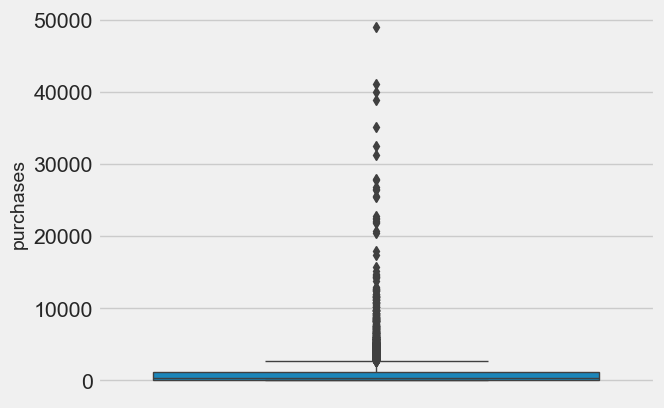

In [329]:
sns.boxplot(y = "purchases", data = data, linewidth = 1)
plt.show()

`Number of purchses is very low`

#### Probability density function of `purchase frequency`

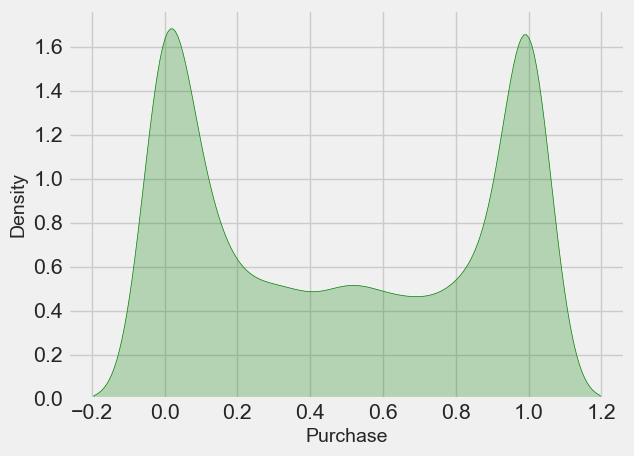

In [330]:
sns.kdeplot(x = 'purchases_frequency', data = data, fill = True, color = 'green')
plt.xlabel("Purchase")
plt.show()

`Most people purchase either too frequently (1) or not too frequently (0)`

#### `Percentage of full payment` vs `Balance` scatterplot

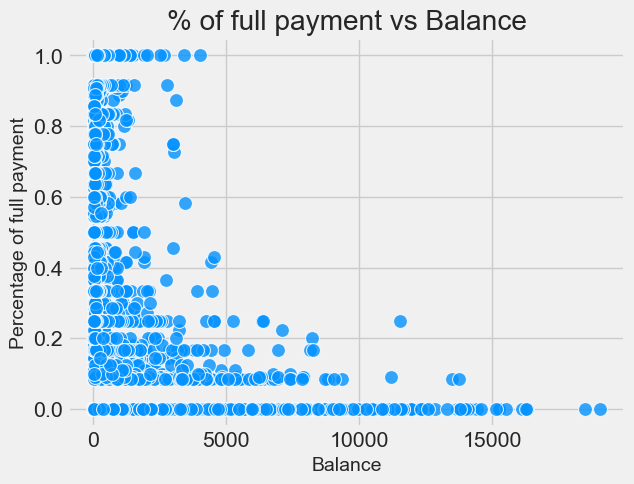

In [331]:
plt.style.use('fivethirtyeight')
sns.scatterplot(x = 'balance', y = 'prc_full_payment', data = data, alpha = 0.8, color = '#0392ff', marker = 'o', s = 100)
plt.xlabel("Balance")
plt.ylabel("Percentage of full payment")
plt.title("% of full payment vs Balance")
plt.show()

`People having higher credit balance mostly do not prefer to full payment `

#### `Correlations` between different features

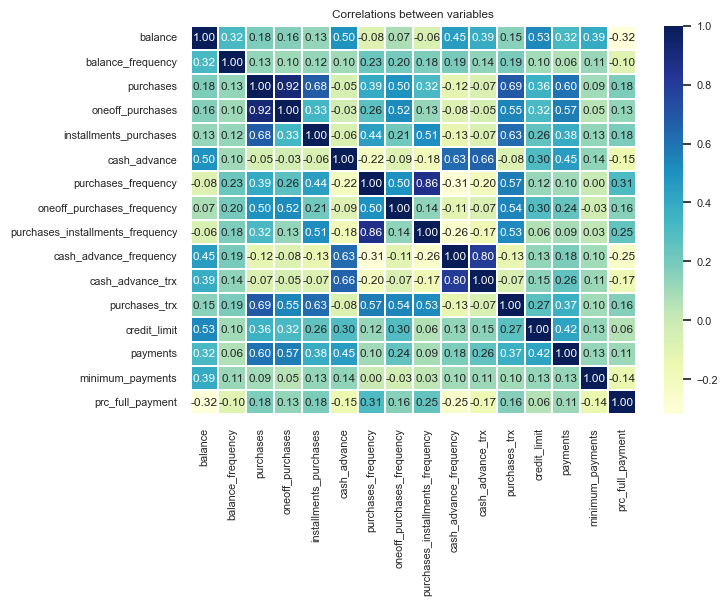

In [332]:
sns.set(font_scale = 0.71)
sns.heatmap(data.corr(), linewidth = 0.3, fmt = '.2f', annot = True, cmap = 'YlGnBu')
plt.title("Correlations between variables")
plt.show()

## Data matrix

In [333]:
X = data.values

## Feature Scaling

In [334]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

## `KMeans Clustering`

### `Elbow method`

In [335]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', n_init = 15, max_iter = 150)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

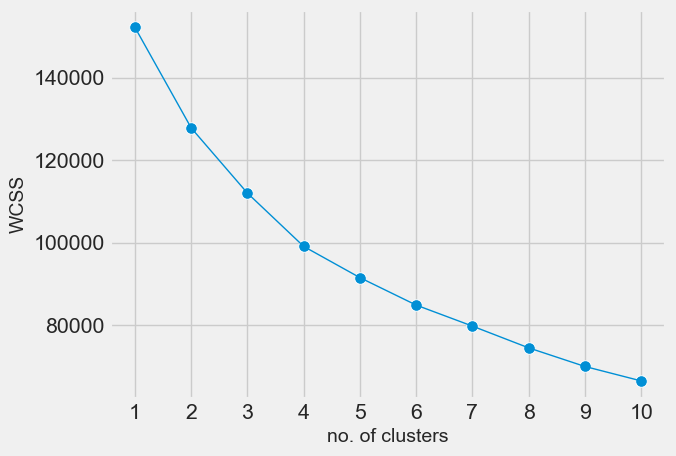

In [336]:
sns.set(font_scale = 1.4)
plt.style.use("fivethirtyeight")
sns.scatterplot(x = range(1, 11), y = wcss, s = 70)
sns.lineplot(x = range(1, 11), y = wcss, linewidth = 1)
plt.xticks(ticks = range(1, 11), labels = range(1, 11))
plt.xlabel("no. of clusters")
plt.ylabel("WCSS")
plt.show()

`Assuming no. of customer segments as 4`

In [337]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 150, n_init = 10)
kmeans.fit(X)

KMeans(max_iter=150, n_clusters=4, n_init=10)

### Silhouette score

In [338]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_, metric = 'euclidean')

0.19758666794734978

### Assigning the customer clusters to the dataset

In [339]:
customer_type = pd.Series(kmeans.labels_, dtype = "int")

In [340]:
data.insert(17, "customer_type", customer_type + 1)

In [341]:
data.head()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,customer_type
0,40.900749,0.818182,95.400002,0.000000,95.400002,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802078,139.509781,0.000000,12,2
1,3202.467529,0.909091,0.000000,0.000000,0.000000,6442.945312,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032715,1072.340210,0.222222,12,3
2,2495.148926,1.000000,773.169983,773.169983,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066772,627.284790,0.000000,12,1
3,1666.670532,0.636364,1499.000000,1499.000000,0.000000,205.788010,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.304932,0.000000,12,2
4,817.714355,1.000000,16.000000,16.000000,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334778,244.791245,0.000000,12,2


## `Visualize`

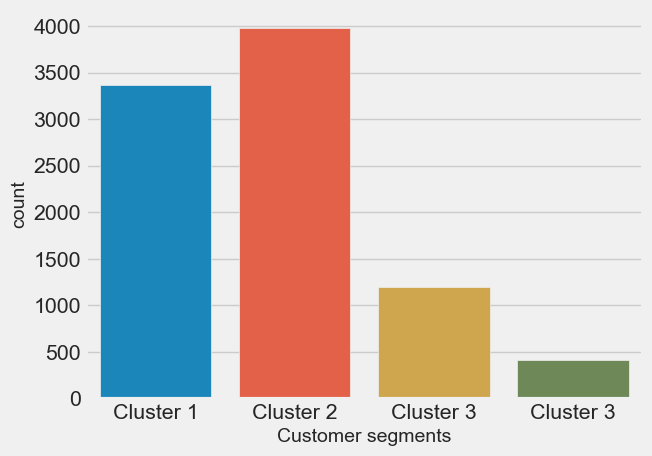

In [342]:
sns.countplot(x = "customer_type", data = data)
plt.xlabel("Customer segments")
plt.xticks(ticks = (0, 1, 2, 3), labels = ["Cluster 1", "Cluster 2", "Cluster 3", "Cluster 3"])
plt.show()

In [343]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8949 entries, 0 to 8948
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   balance                           8949 non-null   float32 
 1   balance_frequency                 8949 non-null   float32 
 2   purchases                         8949 non-null   float32 
 3   oneoff_purchases                  8949 non-null   float32 
 4   installments_purchases            8949 non-null   float32 
 5   cash_advance                      8949 non-null   float32 
 6   purchases_frequency               8949 non-null   float32 
 7   oneoff_purchases_frequency        8949 non-null   float32 
 8   purchases_installments_frequency  8949 non-null   float32 
 9   cash_advance_frequency            8949 non-null   float32 
 10  cash_advance_trx                  8949 non-null   int16   
 11  purchases_trx                     8949 non-null   int16 

## `Visualize`

<Axes: xlabel='customer_type', ylabel='count'>

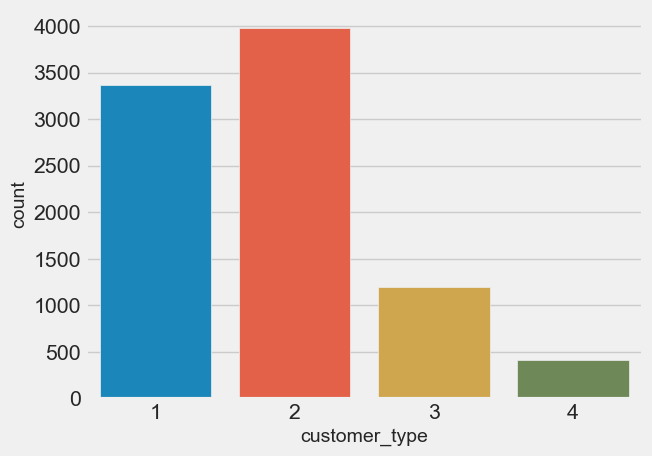

In [344]:
sns.countplot(x = "customer_type", data = data)

## Applying `PCA`

In [345]:
pca  = PCA()
pca.fit(X)

PCA()

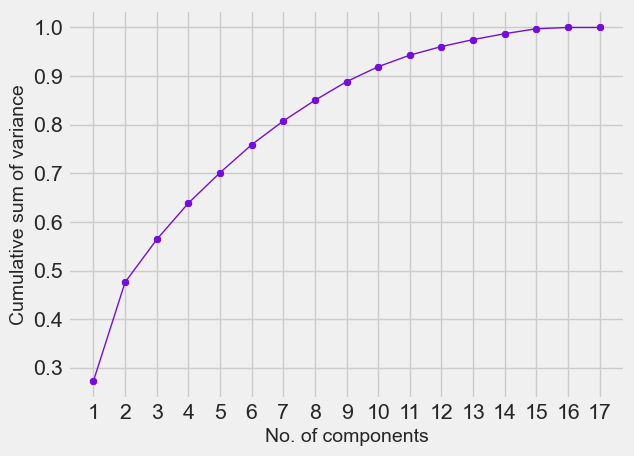

In [346]:
var_x = pca.explained_variance_ratio_
sns.lineplot(x = np.arange(1, len(var_x) + 1, 1), y = var_x.cumsum(), linewidth = 1, color = "#730fd6")
sns.scatterplot(x = np.arange(1, len(var_x) + 1, 1), y = var_x.cumsum(), color = "#730fd6")
plt.xticks(ticks = np.arange(1, len(var_x) + 1, 1))
plt.xlabel("No. of components")
plt.ylabel("Cumulative sum of variance")
plt.show()


`Selecting the no. of components as 2 (for visualization purpose)`

In [347]:
pca = PCA(n_components = 2)
pca_x = pca.fit_transform(X)

### Elbow method

In [348]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', n_init = 15, max_iter = 150)
    kmeans.fit(pca_x)
    wcss.append(kmeans.inertia_)

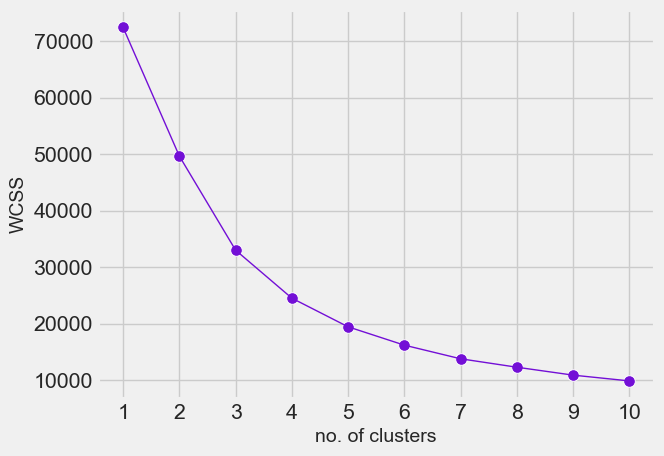

In [349]:
sns.set(font_scale = 1.4)
plt.style.use("fivethirtyeight")
sns.scatterplot(x = range(1, 11), y = wcss, s = 70, color = "#730fd6")
sns.lineplot(x = range(1, 11), y = wcss, linewidth = 1, color = "#730fd6")
plt.xticks(ticks = range(1, 11), labels = range(1, 11))
plt.xlabel("no. of clusters")
plt.ylabel("WCSS")
plt.show()

`Number of clusters = 4`

In [350]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 150, n_init = 15)
kmeans.fit(pca_x)

KMeans(max_iter=150, n_clusters=4, n_init=15)

In [351]:
classes = kmeans.labels_

### Silhouette score

In [352]:
silhouette_score(pca_x, kmeans.labels_, metric = 'euclidean')

0.4076335837357968

### Clusters visualization

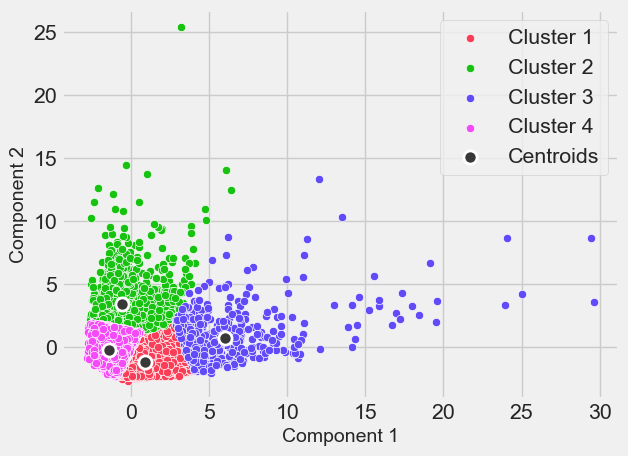

In [353]:
sns.scatterplot(x = pca_x[classes == 0, 0], y = pca_x[classes == 0, 1], color = '#fa3e57', label = "Cluster 1")
sns.scatterplot(x = pca_x[classes == 1, 0], y = pca_x[classes == 1, 1], color = '#17c211', label = "Cluster 2")
sns.scatterplot(x = pca_x[classes == 2, 0], y = pca_x[classes == 2, 1], color = '#614af7', label = "Cluster 3")
sns.scatterplot(x = pca_x[classes == 3, 0], y = pca_x[classes == 3, 1], color = '#f44af7', label = "Cluster 4")
sns.scatterplot(x = kmeans.cluster_centers_[:, 0], y = kmeans.cluster_centers_[:, 1], color = '#383838', s = 90, linewidth = 2, label = "Centroids")
plt.legend()
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()